<a href="https://colab.research.google.com/github/Ishanavi/AlphaRecognition1/blob/main/AlphaRecongition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_upload = files.upload()

Saving labels.csv to labels.csv


In [2]:
from google.colab import files
data_upload = files.upload()

Saving image.npz to image.npz


In [3]:
import cv2
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
X = np.load('image.npz')['arr_0']
y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(y).value_counts())
classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Y','Z']
n_classes = len(classes)

F    550
Z    550
M    550
E    550
H    550
P    550
B    550
J    550
O    550
W    550
C    550
A    550
V    550
Y    550
X    550
K    550
T    550
L    550
N    550
G    550
R    550
I    550
S    550
Q    550
U    550
D    550
Name: labels, dtype: int64


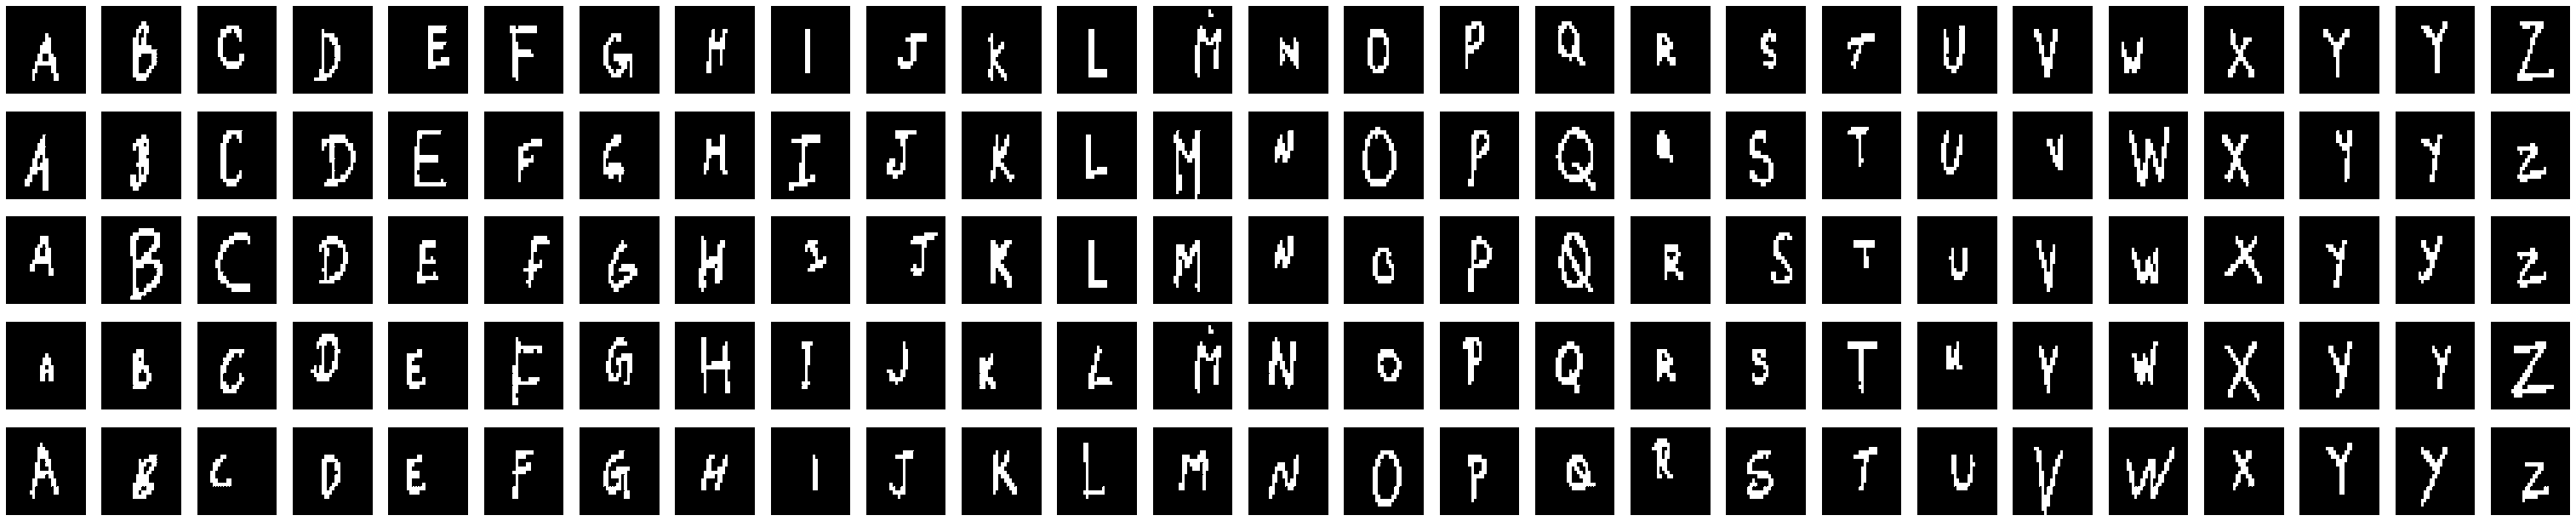

In [5]:
sample_per_class = 5
figure = plt.figure(figsize = (n_classes*2,(1+sample_per_class*2)))
idx_cls = 0

for cls in classes:
  idxs = np.flatnonzero(y==cls)
  idxs = np.random.choice(idxs, sample_per_class, replace=False)
  i = 0

  for idx in idxs:
    plt_idx = i * n_classes+ idx_cls + 1
    p = plt.subplot(sample_per_class, n_classes, plt_idx)
    p = sns.heatmap(np.reshape(X[idx],(22,30)), cmap = plt.cm.gray, xticklabels = False, yticklabels = False, cbar = False)
    p = plt.axis('off')
    i+=1

  idx_cls+=1

In [6]:
print(len(X))
print(len(X[0]))
print(X[0])
print(y[0])

14300
660
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.  

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 2500, train_size = 7500, random_state = 9)

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0
clf = LogisticRegression(solver = 'saga', multi_class = 'multinomial').fit(x_train_scaled, y_train)

y_predict = clf.predict(x_test_scaled)
accuracy = accuracy_score(y_test,y_predict)
print("accuracy = ",accuracy)

accuracy =  0.9952


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


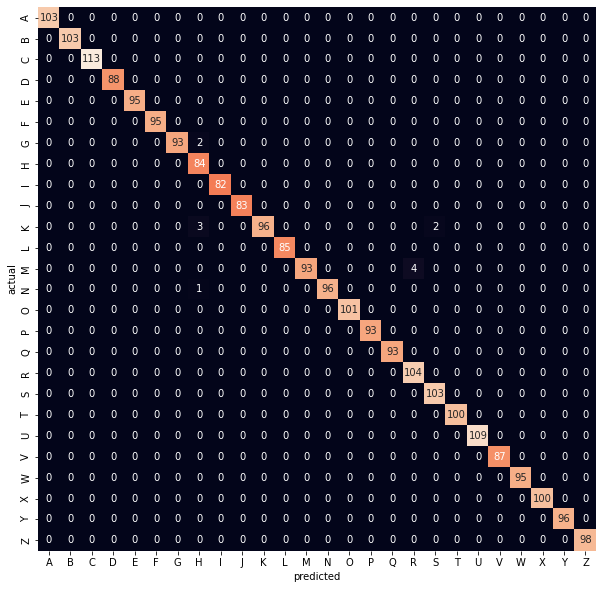

In [8]:
cm = pd.crosstab(y_test, y_predict, rownames = ['actual'], colnames=['predicted'])
p = plt.figure(figsize = (10,10))
p = sns.heatmap(cm, annot= True, fmt="d", cbar=False)